<a href="https://colab.research.google.com/github/paulorfbr/tensor_flow_course_deep_learning/blob/classification/TF_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.version)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
#load data
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state = 13)

In [ ]:
X_train.shape

(381, 30)

In [ ]:
X_test.shape

(188, 30)

In [ ]:
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
R = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 0.8295 - accuracy: 0.5118 - val_loss: 0.7988 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7491 - accuracy: 0.5564 - val_loss: 0.7278 - val_accuracy: 0.5851
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5853 - val_loss: 0.6655 - val_accuracy: 0.6223
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6217 - accuracy: 0.6352 - val_loss: 0.6127 - val_accuracy: 0.6436
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.6982 - val_loss: 0.5684 - val_accuracy: 0.6702
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.7375 - val_loss: 0.5295 - val_accuracy: 0.7128
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4938 - accuracy: 0.7690 - val_loss: 0.4966 - val_accuracy: 0.7500
Epoch 8/100


In [ ]:
print('Train score', model.evaluate(X_train, y_train))
print('Test score', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1064 - accuracy: 0.9685
Train score [0.1064305230975151, 0.9685039520263672]
6/6 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9840
Test score [0.10147664695978165, 0.9840425252914429]


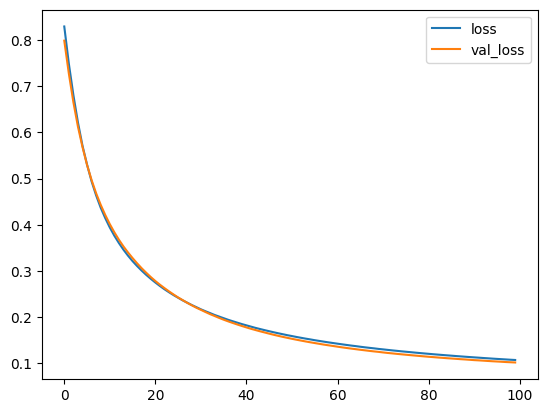

In [ ]:
import matplotlib.pyplot as plt
plt.plot(R.history['loss'],label='loss')
plt.plot(R.history['val_loss'],label='val_loss')
plt.legend()

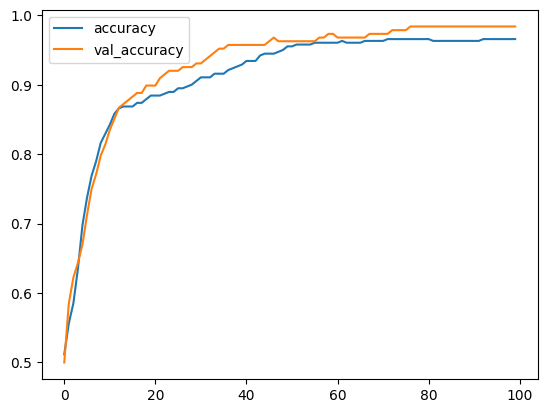

In [ ]:
plt.plot(R.history['accuracy'],label='accuracy')
plt.plot(R.history['val_accuracy'],label='val_accuracy')
plt.legend()

**Making predictions**

In [ ]:
P = model.predict(X_test)
print(P)

6/6 [==============================] - 0s 1ms/step
[[3.8549709e-01]
 [9.3692732e-01]
 [9.8360795e-01]
 [3.9999032e-01]
 [9.8840624e-01]
 [4.4851560e-02]
 [9.5407182e-01]
 [9.9195355e-01]
 [9.7249788e-01]
 [8.2795584e-01]
 [9.9407387e-01]
 [8.0542320e-01]
 [9.9846768e-01]
 [5.8503234e-04]
 [1.1645252e-01]
 [9.8350042e-01]
 [9.4298118e-01]
 [9.7385752e-01]
 [9.9607104e-01]
 [5.6972585e-05]
 [9.2717671e-01]
 [6.3279366e-01]
 [8.1779659e-02]
 [9.9303252e-01]
 [9.8578835e-01]
 [3.0995733e-01]
 [8.8070554e-01]
 [5.6757051e-02]
 [9.7507429e-01]
 [1.8176952e-02]
 [7.1014977e-01]
 [5.1554544e-03]
 [9.9384308e-01]
 [9.6207231e-01]
 [9.5625478e-04]
 [6.1931062e-01]
 [9.1705042e-01]
 [9.9855345e-01]
 [6.9068110e-01]
 [4.3831947e-01]
 [9.7381479e-01]
 [2.6035186e-02]
 [9.5742840e-01]
 [8.7282473e-01]
 [9.4124770e-01]
 [8.1058329e-01]
 [9.9841952e-01]
 [9.8344082e-01]
 [8.0082619e-01]
 [9.9172986e-01]
 [1.5483235e-01]
 [2.2998696e-02]
 [3.0630414e-04]
 [9.8015869e-01]
 [9.4830853e-01]
 [1.7523277e-0

In [ ]:
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [ ]:
#calculate manually accuraccy
print('Manually calculated acc:', np.mean( P == y_test))
print('Evaluate model acc:', model.evaluate(X_test,y_test))

Manually calculated acc: 0.9840425531914894
6/6 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9840
Evaluate model acc: [0.10147664695978165, 0.9840425252914429]


**Saving model**

In [ ]:
model.save('linearclassifier.keras')

In [ ]:
#check file in file system
!ls -lh

total 44K
-rw-r--r-- 1 root root  20K Oct  6 08:45 linearclassifier.h5
-rw-r--r-- 1 root root  17K Oct  6 08:53 linearclassifier.keras
drwxr-xr-x 1 root root 4.0K Oct  4 13:23 sample_data


In [ ]:
model_loaded = tf.keras.models.load_model('linearclassifier.keras')
print(model_loaded.layers)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9840


[0.10147664695978165, 0.9840425252914429]